# BM

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import genextreme, kstest, norm

# Fungsi untuk menghitung VaR dan CVaR menggunakan distribusi GEV
def calculate_var_cvar(gev_params, probabilities):
    shape, loc, scale = gev_params
    results = {}

    for prob in probabilities:
        # Menghitung VaR menggunakan quantile (ppf) dari distribusi GEV
        var = genextreme.ppf(1 - prob, shape, loc, scale)

        # Menghitung CVaR dengan menggunakan ekspektasi distribusi GEV
        cvar = (1 / prob) * genextreme.expect(lambda x: x, args=(shape,), loc=loc, scale=scale, lb=var)

        results[prob] = {'VaR': var, 'CVaR': cvar}

    return results

# Mengambil data harga penutupan saham dan menghitung return logaritmik
stocks = ['BYAN.JK', 'INAI.JK', 'ALMI.JK','GGRP.JK']
start_date = "2023-12-01"
end_date = "2024-12-01"
data = yf.download(stocks, start=start_date, end=end_date, interval="1d")
close_prices = data['Adj Close']
log_returns = np.log(close_prices).diff().dropna()

# Menentukan panjang blok untuk analisis (misalnya, blok mingguan)
block_size = 5  # Blok berukuran 5 hari (misalnya 1 minggu)
block_maxima = log_returns.groupby(np.arange(len(log_returns)) // block_size).max()

# Tampilkan block maxima
print("Block Maxima:")
print(block_maxima)

# Uji distribusi GEV pada block maxima dan hitung p-value menggunakan Kolmogorov-Smirnov Test
gev_params = {}
for stock in block_maxima.columns:
    # Estimasi parameter distribusi GEV untuk data block maxima
    params = genextreme.fit(block_maxima[stock].dropna())
    gev_params[stock] = params
    print(f"GEV Parameters untuk {stock}: {params}")

    # Uji kesesuaian distribusi GEV menggunakan Kolmogorov-Smirnov Test
    ks_stat, ks_p_value = kstest(block_maxima[stock].dropna(), 'genextreme', args=params)
    print(f"KS Statistic untuk {stock}: {ks_stat}")
    print(f"KS p-value untuk {stock}: {ks_p_value}")

    print("-" * 50)

# Hitung VaR dan CVaR untuk setiap saham
probabilities = [0.05]  # 5% VaR
for stock in block_maxima.columns:
    print(f"\nVaR dan CVaR untuk {stock}:")
    var_cvar_results = calculate_var_cvar(gev_params[stock], probabilities)

    for prob, values in var_cvar_results.items():
        print(f"Probabilitas: {prob * 100:.0f}%")
        print(f"VaR: {values['VaR']:.6f}")
        print(f"CVaR: {values['CVaR']:.6f}")
        print("-" * 50)


[*********************100%***********************]  4 of 4 completed


Block Maxima:
Ticker   ALMI.JK   BYAN.JK   GGRP.JK   INAI.JK
0       0.019803  0.000000  0.013304  0.025447
1       0.028988  0.025976  0.031322  0.035809
2       0.015504  0.014221  0.030371  0.019418
3       0.005249  0.026839  0.008621  0.029559
4       0.031918  0.019024  0.004435  0.039221
5       0.032612  0.002535  0.013187  0.028438
6       0.037740  0.007595  0.004396  0.063281
7       0.027102  0.007643  0.017858  0.019048
8       0.011300  0.001268 -0.004556  0.058841
9       0.017392  0.003834  0.018780  0.029559
10      0.034686  0.031091  0.034401  0.020001
11      0.014389  0.005148  0.059788  0.028331
12      0.000000  0.009015  0.028304  0.047502
13      0.008969  0.002574  0.019048  0.035809
14     -0.019608  0.011757  0.046737  0.026111
15      0.030305  0.002635  0.004914  0.031582
16      0.091567  0.014522  0.009756  0.031253
17      0.000000  0.029296  0.004866  0.026111
18     -0.023811  0.006601  0.000000  0.010695
19      0.000000  0.005277  0.070618  0.016086

In [ ]:
# Menentukan panjang blok untuk analisis (misalnya, blok mingguan)
block_size = 5  # Blok berukuran 5 hari (misalnya 1 minggu)
block_maxima = log_returns.groupby(np.arange(len(log_returns)) // block_size).max()

# Tampilkan block maxima
print("Block Maxima:")
print(block_maxima)

# Menampilkan jumlah blok yang terbentuk
num_blocks = len(block_maxima)
print(f"\nJumlah blok yang terbentuk: {num_blocks}")


Block Maxima:
Ticker   ALMI.JK   BYAN.JK   GGRP.JK   INAI.JK
0       0.019803  0.000000  0.013304  0.025447
1       0.028988  0.025976  0.031322  0.035809
2       0.015504  0.014221  0.030371  0.019418
3       0.005249  0.026839  0.008621  0.029559
4       0.031918  0.019024  0.004435  0.039221
5       0.032612  0.002535  0.013187  0.028438
6       0.037740  0.007595  0.004396  0.063281
7       0.027102  0.007643  0.017858  0.019048
8       0.011300  0.001268 -0.004556  0.058841
9       0.017392  0.003834  0.018780  0.029559
10      0.034686  0.031091  0.034401  0.020001
11      0.014389  0.005148  0.059788  0.028331
12      0.000000  0.009015  0.028304  0.047502
13      0.008969  0.002574  0.019048  0.035809
14     -0.019608  0.011757  0.046737  0.026111
15      0.030305  0.002635  0.004914  0.031582
16      0.091567  0.014522  0.009756  0.031253
17      0.000000  0.029296  0.004866  0.026111
18     -0.023811  0.006601  0.000000  0.010695
19      0.000000  0.005277  0.070618  0.016086

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import genextreme, kstest, chi2

# Fungsi untuk menghitung VaR dan CVaR menggunakan distribusi GEV
def calculate_var_cvar(gev_params, probabilities):
    shape, loc, scale = gev_params
    results = {}

    for prob in probabilities:
        # Menghitung VaR menggunakan quantile (ppf) dari distribusi GEV
        var = genextreme.ppf(1 - prob, shape, loc, scale)

        # Menghitung CVaR dengan menggunakan ekspektasi distribusi GEV
        cvar = (1 / prob) * genextreme.expect(lambda x: x, args=(shape,), loc=loc, scale=scale, lb=var)

        results[prob] = {'VaR': var, 'CVaR': cvar}

    return results

# Fungsi untuk melakukan uji Kupiec (backtesting)
def kupiec_test(num_failures, total_obs, alpha):
    p_hat = num_failures / total_obs  # Proporsi kegagalan observasi
    LR_uc = -2 * np.log(
        ((1 - alpha) ** (total_obs - num_failures) * (alpha ** num_failures)) /
        ((1 - p_hat) ** (total_obs - num_failures) * (p_hat ** num_failures))
    )
    p_value = 1 - chi2.cdf(LR_uc, df=1)  # P-value dari distribusi chi-squared
    return LR_uc, p_value

# Mengambil data harga penutupan saham dan menghitung return logaritmik
stocks = ['BYAN.JK', 'INAI.JK', 'ALMI.JK','GGRP.JK']
start_date = "2023-12-01"
end_date = "2024-12-01"
data = yf.download(stocks, start=start_date, end=end_date, interval="1d")
close_prices = data['Adj Close']
log_returns = np.log(close_prices).diff().dropna()  # Menggunakan log_returns

# Menentukan panjang blok untuk analisis (misalnya, blok mingguan)
block_size = 5  # Blok berukuran 5 hari (misalnya 1 minggu)
block_maxima = log_returns.groupby(np.arange(len(log_returns)) // block_size).max()

# Estimasi parameter distribusi GEV untuk block maxima dan hitung p-value menggunakan Kolmogorov-Smirnov Test
gev_params = {}
for stock in block_maxima.columns:
    params = genextreme.fit(block_maxima[stock].dropna())  # Estimasi parameter distribusi GEV
    gev_params[stock] = params

# Hitung VaR dan CVaR untuk setiap saham
probabilities = [0.05]  # 5% VaR
var_bm_results = {}
for stock in block_maxima.columns:
    var_cvar_results = calculate_var_cvar(gev_params[stock], probabilities)
    var_bm_results[stock] = var_cvar_results[0.05]  # Ambil hasil untuk probabilitas 5%

# Backtesting dengan uji Kupiec
alpha = 0.05  # Level kepercayaan untuk VaR 5%
results_kupiec = {}

# Iterasi untuk setiap kolom di DataFrame log_returns
for column in log_returns.columns:
    var_gev = var_bm_results[column]['VaR']  # Ambil nilai VaR untuk saham ini

    # Hitung jumlah kegagalan di mana return lebih rendah dari VaR
    failures = log_returns[column][log_returns[column] < -var_gev]  # Menggunakan log_returns
    num_failures = len(failures)
    total_obs = len(log_returns[column])

    # Lakukan uji Kupiec
    LR_uc, p_value = kupiec_test(num_failures, total_obs, alpha)

    # Simpan hasil backtesting untuk setiap saham
    results_kupiec[column] = {
        "Num Failures": num_failures,
        "Total Obs": total_obs,
        "LR_uc": LR_uc,
        "P-value": p_value,
        "Validation": "Valid" if p_value > 0.05 else "Invalid"
    }

# Konversi hasil ke dalam bentuk DataFrame untuk mudah dianalisis
kupiec_summary = pd.DataFrame(results_kupiec).T
print(kupiec_summary)


[*********************100%***********************]  4 of 4 completed


        Num Failures Total Obs      LR_uc   P-value Validation
ALMI.JK           11       236   0.058358  0.809111      Valid
BYAN.JK            1       236  17.175893  0.000034    Invalid
GGRP.JK            8       236   1.445518  0.229248      Valid
INAI.JK            5       236   5.217574   0.02236    Invalid


In [ ]:
import numpy as np
from scipy.stats import kstest

# Tingkat signifikansi
alpha = 0.05

# Fungsi untuk menghitung nilai D_tabel
def d_table(alpha, n):
    return np.sqrt(-np.log(alpha / 2) / (2 * n))

# Uji KS dan perhitungan nilai D_tabel
print("Kolmogorov-Smirnov Test Results with D-tabel:")
for stock in log_returns.columns:
    sample = log_returns[stock].dropna()
    n = len(sample)
    ks_stat, ks_p_value = kstest(sample, 'norm', args=(sample.mean(), sample.std()))
    d_tabel = d_table(alpha, n)
    print(f'{stock}:')
    print(f'  KS Statistic (D_hitung) = {ks_stat}')
    print(f'  p-value = {ks_p_value}')
    print(f'  D_tabel = {d_tabel}')
    print(f'  Hasil: {"Ditolak" if ks_stat > d_tabel else "Diterima"}')


Kolmogorov-Smirnov Test Results with D-tabel:
ALMI.JK:
  KS Statistic (D_hitung) = 0.18225974078424517
  p-value = 2.475751549742718e-07
  D_tabel = 0.08840487866783873
  Hasil: Ditolak
BYAN.JK:
  KS Statistic (D_hitung) = 0.21376259221722704
  p-value = 6.068199036610691e-10
  D_tabel = 0.08840487866783873
  Hasil: Ditolak
GGRP.JK:
  KS Statistic (D_hitung) = 0.26293000739860517
  p-value = 6.9156415511829744e-15
  D_tabel = 0.08840487866783873
  Hasil: Ditolak
INAI.JK:
  KS Statistic (D_hitung) = 0.10242744426831796
  p-value = 0.01311259460477248
  D_tabel = 0.08840487866783873
  Hasil: Ditolak


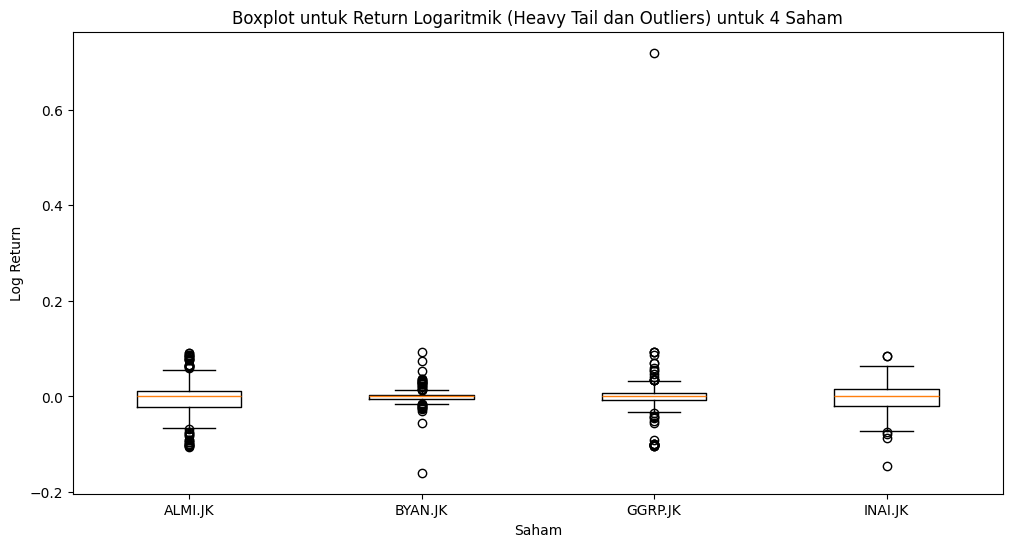

In [ ]:
# Boxplot untuk menganalisis heavy tail atau outliers untuk setiap saham
plt.figure(figsize=(12, 6))
plt.boxplot([log_returns[stock] for stock in log_returns.columns], vert=True, labels=log_returns.columns)
plt.title("Boxplot untuk Return Logaritmik (Heavy Tail dan Outliers) untuk 4 Saham")
plt.xlabel('Saham')
plt.ylabel('Log Return')
plt.show()

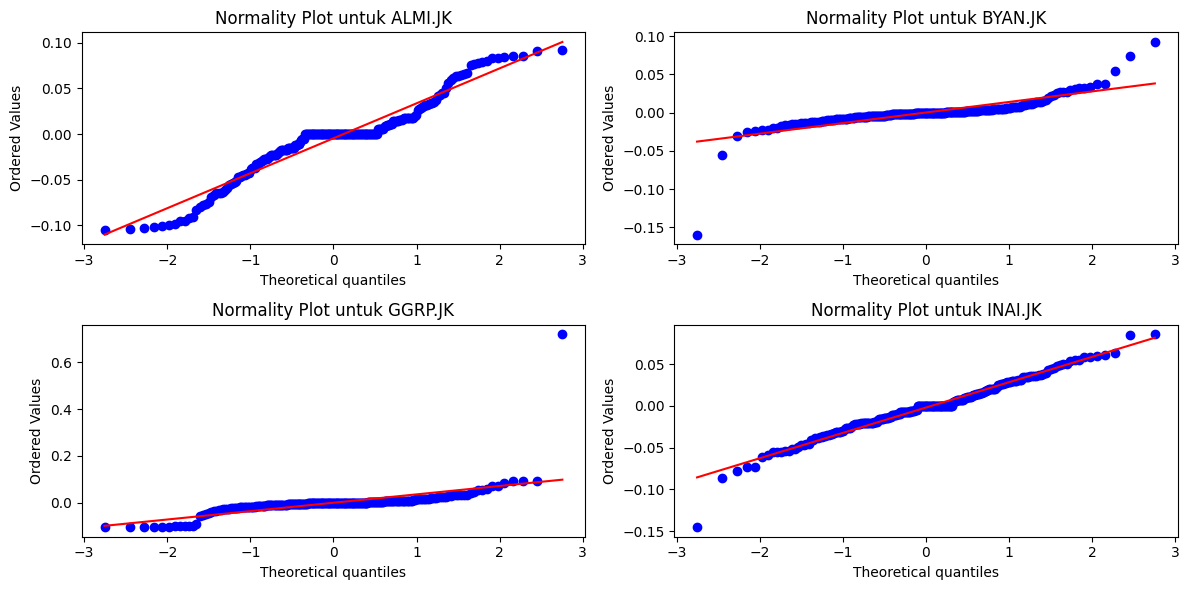

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Membuat normality plot (Q-Q plot) untuk setiap saham
plt.figure(figsize=(12, 6))

for i, stock in enumerate(log_returns.columns):
    plt.subplot(2, 2, i+1)  # Menyusun 2x2 grid untuk plot
    stats.probplot(log_returns[stock].dropna(), dist="norm", plot=plt)
    plt.title(f"Normality Plot untuk {stock}")

plt.tight_layout()
plt.show()


# POT

In [ ]:
import yfinance as yf
import numpy as np
import scipy.stats as stats
import pandas as pd

# Mengambil data harga penutupan saham
stocks = ['BYAN.JK', 'INAI.JK', 'ALMI.JK', 'GGRP.JK']
start_date = "2023-12-01"
end_date = "2024-12-01"
data = yf.download(stocks, start=start_date, end=end_date, interval="1d")
close_prices = data['Adj Close']

# Menghitung log return
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

def pot_algorithm(data, threshold_percentile=95, alpha=0.05):
    """
    Implements the Peak Over Threshold (POT) algorithm.

    Parameters:
        data (list or numpy array): The dataset to analyze.
        threshold_percentile (float): The percentile for the threshold (default: 95).
        alpha (float): The significance level for VaR calculation (default: 0.05).

    Returns:
        dict: A dictionary containing the threshold, extreme values, GPD parameters, VaR, and CVaR.
    """
    # Step 1: Determine the threshold
    threshold = np.percentile(data, threshold_percentile)

    # Step 2: Extract data above the threshold
    extreme_values = data[data > threshold]

    if len(extreme_values) == 0:
        raise ValueError("No extreme values found above the threshold.")

    # Step 3: Fit the Generalized Pareto Distribution (GPD) to the extreme values
    # Use Maximum Likelihood Estimation (MLE)
    shape, loc, scale = stats.genpareto.fit(extreme_values - threshold)

    # Uji Kolmogorov-Smirnov (KS)
    ks_stat, p_value_gpd = stats.kstest(extreme_values - threshold, 'genpareto', args=[shape, loc, scale])

    # Step 4: Calculate Value at Risk (VaR) using the fitted GPD parameters
    n = len(data)  # Total number of observations
    k = len(extreme_values)  # Number of observations above the threshold

    # Calculate VaR
    var = threshold + (scale / shape) * (((n / k) * (1 - alpha))**(-shape) - 1)

    # Step 5: Calculate Conditional VaR (CVaR)
    # CVaR is the average of the losses that are greater than the VaR
    cvar = np.mean(extreme_values[extreme_values > var])

    # Return results
    results = {
        "threshold": threshold,
        "extreme_values": extreme_values,
        "gdp_shape": shape,
        "gdp_loc" : loc,
        "gdp_scale": scale,
        "KS stat" : ks_stat,
        "p-value" : p_value_gpd,
        "var": var,
        "cvar": cvar
    }
    return results

# Menggunakan log returns dari data
results_all = []
var_results = {}

for stock in close_prices.columns:
    data = log_returns[stock].values
    results = pot_algorithm(data, threshold_percentile=95, alpha=0.05)
    var_results[stock] = {"VaR (GPD)": results["var"], "CVaR (GPD)": results["cvar"]}
    results_all.append({
        "Ticker": stock,
        "Threshold": results["threshold"],
        "Extreme Values Count": len(results["extreme_values"]),
        "GDP_Shape": results["gdp_shape"],
        "GDP_Loc" : results['gdp_loc'],
        "GDP_Scale": results["gdp_scale"],
        "KS Statistics": results['KS stat'],
        "P-Value" : results['p-value'],
        "Distribution": "Accept" if  results['p-value'] >= 0.05 else "Decline",
        "VaR": results["var"],
        "CVaR": results["cvar"]
    })

# Menyusun hasil analisis dalam DataFrame
pot_results = pd.DataFrame(results_all).set_index('Ticker')
pot_results


[*********************100%***********************]  4 of 4 completed


,Threshold,Extreme Values Count,GDP_Shape,GDP_Loc,GDP_Scale,KS Statistics,P-Value,Distribution,VaR,CVaR
Ticker,,,,,,,,,,
ALMI.JK,0.069015,12,0.179364,0.006971,0.006414,0.232743,0.464960,Accept,0.054408,0.083010
BYAN.JK,0.026939,12,0.753670,0.000302,0.006713,0.156467,0.887260,Accept,0.019013,0.042381
GGRP.JK,0.036593,12,0.988752,0.003573,0.026754,0.246900,0.392764,Accept,0.011032,0.123634
INAI.JK,0.049140,12,0.002358,0.001050,0.011340,0.154803,0.894360,Accept,0.016055,0.061544


In [ ]:
from scipy.stats import chi2

# Fungsi untuk melakukan uji Kupiec (backtesting)
def kupiec_test(num_failures, total_obs, alpha):
    p_hat = num_failures / total_obs  # Proporsi kegagalan observasi
    LR_uc = -2 * np.log(
        ((1 - alpha) ** (total_obs - num_failures) * (alpha ** num_failures)) /
        ((1 - p_hat) ** (total_obs - num_failures) * (p_hat ** num_failures))
    )
    p_value = 1 - chi2.cdf(LR_uc, df=1)  # P-value dari distribusi chi-squared
    return LR_uc, p_value

# Backtesting dengan uji Kupiec
alpha = 0.05  # Level kepercayaan untuk VaR 5%
results_kupiec = {}

# Iterasi untuk setiap kolom di DataFrame log_returns
for column in log_returns.columns:
    var = var_results[column]["VaR (GPD)"]  # Ambil nilai VaR yang benar untuk saham ini

    # Hitung jumlah kegagalan di mana return lebih rendah dari VaR
    failures = log_returns[column][log_returns[column] < -var]  # Menggunakan log_returns
    num_failures = len(failures)
    total_obs = len(log_returns[column])

    # Lakukan uji Kupiec
    LR_uc, p_value = kupiec_test(num_failures, total_obs, alpha)

    # Simpan hasil backtesting untuk setiap saham
    results_kupiec[column] = {
        "Num Failures": num_failures,
        "Total Obs": total_obs,
        "LR_uc": LR_uc,
        "P-value": p_value,
        "Validation": "Valid" if p_value > 0.05 else "Invalid"
    }

# Konversi hasil ke dalam bentuk DataFrame untuk mudah dianalisis
kupiec_summary = pd.DataFrame(results_kupiec).T
print(kupiec_summary)


        Num Failures Total Obs       LR_uc   P-value Validation
ALMI.JK           26       236   13.598833  0.000226    Invalid
BYAN.JK            9       236    0.759075  0.383618      Valid
GGRP.JK           49       236   71.669855       0.0    Invalid
INAI.JK           69       236  145.331033       0.0    Invalid
